<a href="https://colab.research.google.com/github/bhavya-v-sudo/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Import libraries
# Basic libs
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# Ignore  the warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

# kmeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### **Data Set Overview**

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the data**

In [3]:
# Read the data
# converts csv file to DataFrame.
netflix_df = pd.read_csv('/content/drive/MyDrive/capstone project - 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

**First Five Observations**

In [4]:
# Observing the first five observations using head()
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


OBSERVATION:

We can notice the dataset has Nan values. This looks like a typical movies/TV shows dataset without user ratings.

**Last Five Observations**

In [5]:
# Observing the last five observations using tail()
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


**Shape of the Data**

In [6]:
netflix_df.shape

(7787, 12)

The provided data consists of over 7787 observations with 12 column variables.

**Feature Data Types**

In [7]:
# Observing the data types for all the columns.
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Few columns- director, cast, country, date_added, and rating contain null values.

The dataset consists of eleven non- numeric columns and one numeric column.

In [8]:
# Feature Statistics Summary
# Provides the statistical details for each column.
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### **Removing Null Values, Duplicate Values**

In [9]:
# For missing data
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are 2389 null values in director, 718 null values in cast, 507 null values in country, 10 null values in date_added, and 7 null values in rating.

* 'Director' feature has 30.68% null values. 
* 'Cast' feature has 9.22% null values.
* 'Country' feature has 6.51% null values.
* 'date_added' ffeature has 0.13% null values.
* 'rating' feature has 0.09% null values.


In [10]:
# dropping NaN values from date_added, rating
# filling director, cast, country - NaN values with No Director, No Cast, Country Not Available respectively.
# Due to the high number of null values in director, cast, and country, dropping them would lead to imbalanced data 
# and incorrect EDA analysis. Therefore, they are retained.

netflix_df['director'].fillna('No Director', inplace=True)
netflix_df['cast'].fillna('No Cast', inplace=True)
netflix_df['country'].fillna('Country Not Available', inplace=True)
netflix_df.dropna(subset=['date_added','rating'],inplace=True)
netflix_df = netflix_df.reset_index(drop=True)

SIDE NOTE:

Instead of dropping all Nan values, only date_added and rating Nan values are removed. Dropping director, cast, and country Nan values would have resulted in a significant loss of data.

In [11]:
# Updated dataframe
netflix_df.shape

(7770, 12)

In [12]:
# Rechecking for clean data.
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [13]:
#Checking Unique values in each variable
netflix_df.nunique()

show_id         7770
type               2
title           7770
director        4048
cast            6818
country          682
date_added      1563
release_year      73
rating            14
duration         216
listed_in        491
description     7752
dtype: int64

A show_id is a unique identifier, and no title is repeated. A number of unique values are also contained in director, cast, country, date_added, listed_in, and description.

In [14]:
# Checking for duplicate values
list(netflix_df[netflix_df.duplicated()].sum(axis = 1))

[]

###**Exploratory Data Analysis**

Text(0.5, 1.0, 'Count of Movies and TV Shows')

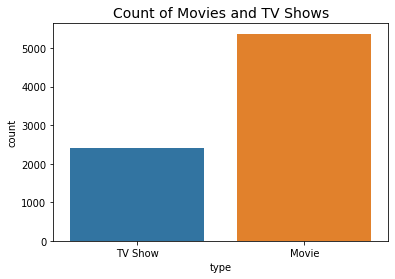

In [15]:
# Netflix Film Types: Movie or TV Show
sns.countplot(x="type", data=netflix_df)
plt.title("Count of Movies and TV Shows", fontsize=14)

Almost 70% of datapoints belong to Movie, rest 30% to TV Show

Text(0.5, 1.0, 'Pie representation of Movies and TV Shows')

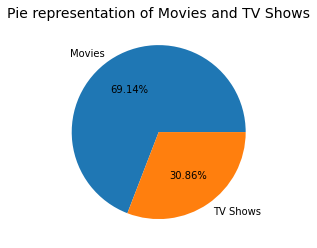

In [16]:
# Pie Chart Representation - Netflix Film Types: Movie or TV Show
plt.pie(netflix_df.type.value_counts(),labels=["Movies","TV Shows"],autopct="%1.2f%%")
plt.title("Pie representation of Movies and TV Shows", fontsize=14)

OBSERVATION:

There are more than 5000+ movies and 2000+ TV shows.It should be noted that a TV Show has at least one season with many episodes, so the TV Shows count being less than Movies is logical.

Text(0.5, 1.0, 'Ratings for Movies & TV Shows')

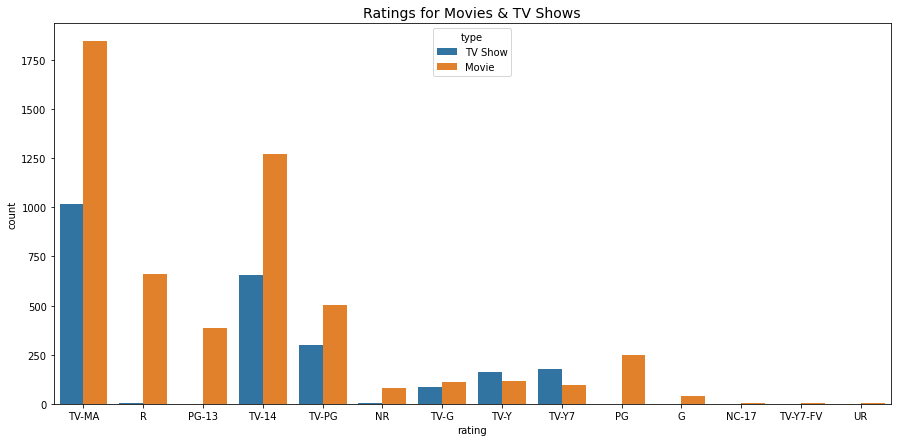

In [17]:
# Netflix Film Ratings
plt.figure(figsize=(15,7))
sns.countplot(x="rating", data=netflix_df, hue='type')
plt.title("Ratings for Movies & TV Shows", fontsize=14)

OBSERVATION:

The NR and UR stand for Non-Rated and UnRated content, so they could be ignored. The number of mature content movies is greater than the number of mature content TV shows. The majority of TV shows are geared toward younger viewers.

In [18]:
# Extracting month and year from date.
netflix_df1 = netflix_df.copy()
netflix_df1['date_added'] = pd.to_datetime(netflix_df1['date_added'])
netflix_df1['month_added'] = netflix_df1['date_added'].dt.month
netflix_df1['year_added'] = netflix_df1['date_added'].dt.year

Text(0.5, 1.0, 'Heatmap - year_added and month_added')

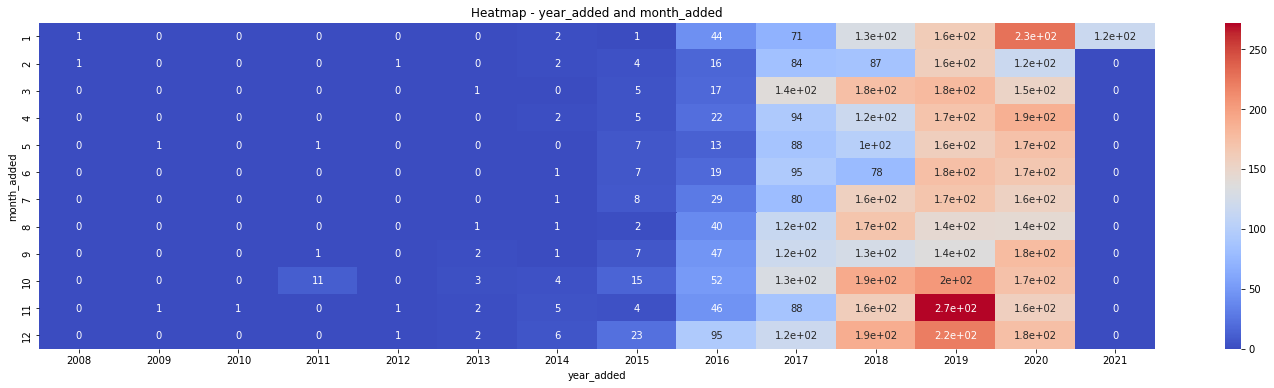

In [19]:
# Plotting year vs month on heatmap.
plt.figure(figsize = (25, 6))
sns.heatmap(netflix_df1.groupby('year_added').month_added.value_counts().unstack().fillna(0).T, cmap = 'coolwarm', annot = True)
plt.title("Heatmap - year_added and month_added")

OBSERVATION:

1. From 2014 the number of shows have increased. The data given to us stops at 2021 January.
2. In 2018, 2019, and 2020, the majority of films were released.
3. A large number of movies and TV Shows were released in October, November, December, and January.

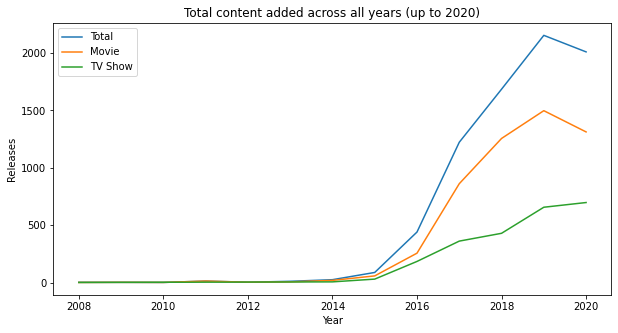

In [20]:
# Amount of Content as a Function of Time
netflix_year = netflix_df1.year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
total_year = netflix_year[netflix_year.year != 2021]
netflix_movie_year = netflix_df1[netflix_df1['type'] == 'Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = netflix_movie_year[netflix_movie_year.year!= 2021]
netflix_tvshow_year = netflix_df1[netflix_df1['type'] == 'TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
tvshow_year = netflix_tvshow_year[netflix_tvshow_year.year!= 2021]

plt.figure(figsize = (10, 5))
sns.lineplot(data=total_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=tvshow_year, x='year', y='count')
plt.title('Total content added across all years (up to 2020)')
plt.ylabel('Releases')
plt.xlabel('Year')
plt.legend(['Total','Movie','TV Show'])

OBSERVATION:

**Is Netflix has increasingly focusing on TV rather than movies in recent years?**

The number of movies in 2020 have reduced compared to its previous year. However the TV shows have increased.

Text(0.5, 1.0, 'Duration Distribution for Netflix Movies')

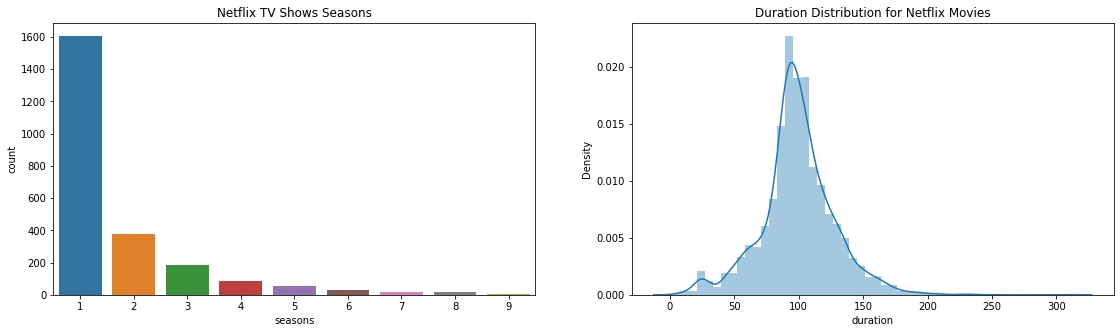

In [21]:
# Netflix Film Duration
fig, ax = plt.subplots(1,2, figsize=(19, 5))
show_duration_df = pd.DataFrame(netflix_df1[netflix_df1.type == 'TV Show'].duration.replace(['1 Season'], '1 Seasons').str.replace(' Seasons','').sort_values()).astype(int)
plt1 = sns.countplot(data = show_duration_df, x = 'duration', order = list(range(1,10)), ax=ax[0])
plt1.set_xlabel('seasons')
plt1.set_title("Netflix TV Shows Seasons")
movie_duration_df = pd.DataFrame(netflix_df1[netflix_df1.type == 'Movie'].duration.str.replace(' min', '').astype(int))
plt2 = sns.distplot(movie_duration_df.duration, ax=ax[1])
plt2.set_title("Duration Distribution for Netflix Movies")

OBSERVATION:

Seasons of Netflix TV shows are right-skewed and most have only one season. Netflix movies have a normal distribution with a mean of 100 minutes.

Text(0, 0.5, 'Country')

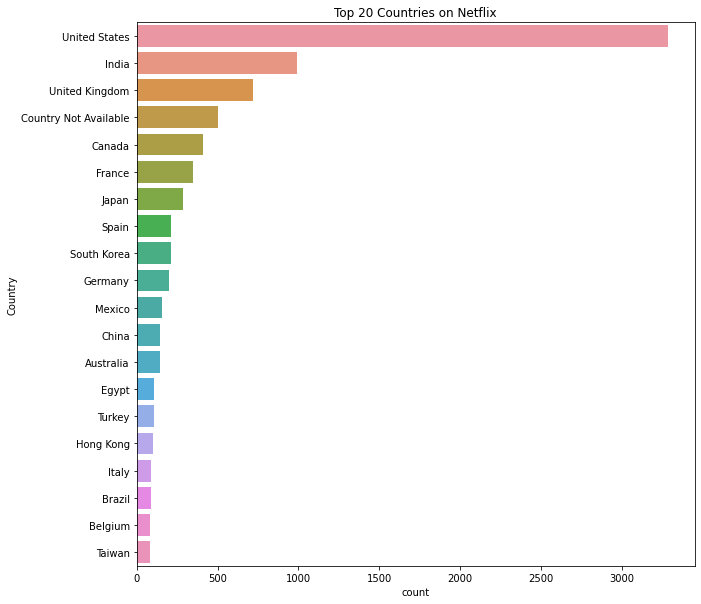

In [22]:
# Countries with the most content available
countries = netflix_df1['country'].str.split(', ', expand=True).stack().reset_index(level = 1, drop = True)
countries = countries[countries != 'Country Not available']
plt.figure(figsize = (10, 10))
sns.countplot(y = countries, order=countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.ylabel('Country')

OBSERVATION:


knowing that Netflix is an American brand, it is no surprise that the United States is the most popular country to watch Netflix in. In second place is India, followed by the UK and Canada. 

Text(0, 0.5, 'genres')

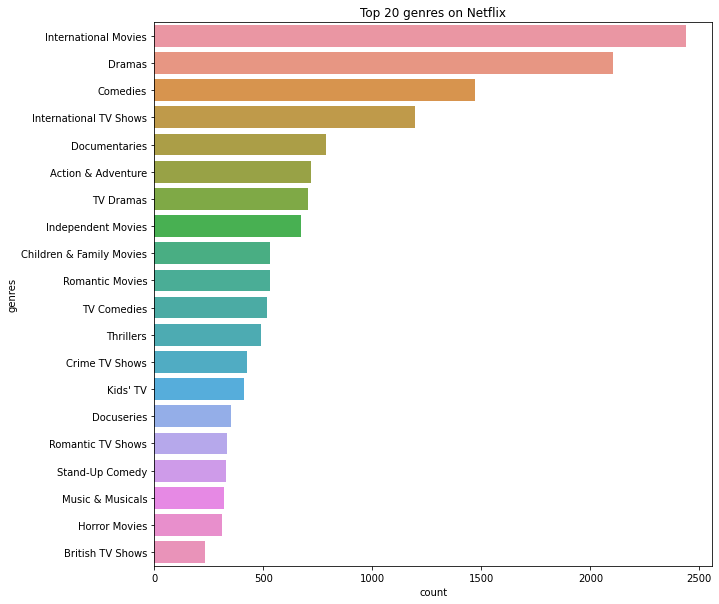

In [23]:
# Popular Genres
genres = netflix_df1['listed_in'].str.split(', ', expand=True).stack().reset_index(level = 1, drop = True)
plt.figure(figsize = (10, 10))
sns.countplot(y = genres, order=genres.value_counts().index[:20])
plt.title('Top 20 genres on Netflix')
plt.ylabel('genres')

OBSERVATION:

On Netflix, international movies are the most popular genre, followed by dramas and comedies. With Netflix having a lot of international subscribers, it makes sense to have international movies at the top.

Text(0, 0.5, 'director')

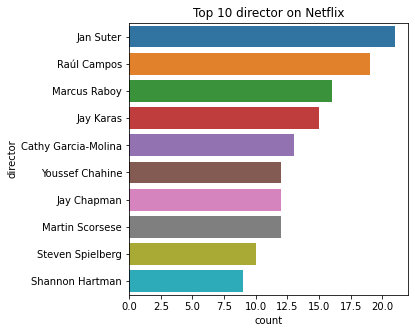

In [24]:
# top 10 directors on Netflix with the most releases
director = netflix_df1['director'].str.split(', ', expand=True).stack().reset_index(level = 1, drop = True)
director = director[director != 'No Director']
plt.figure(figsize = (5, 5))
sns.countplot(y = director, order=director.value_counts().index[:10])
plt.title('Top 10 director on Netflix')
plt.ylabel('director')

OBSERVATION:

The number of international movies is higher, so it should come as no surprise that the most movie directors are international. 

Text(0, 0.5, 'cast')

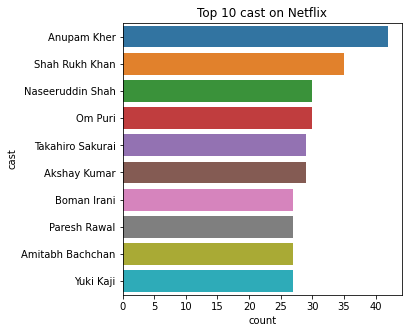

In [25]:
# top 10 actors on Netflix based on number of titles
cast = netflix_df1[netflix_df1['cast'] != 'No Cast'].cast.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
plt.figure(figsize = (5, 5))
sns.countplot(y = cast, order=cast.value_counts().index[:10])
plt.title('Top 10 cast on Netflix')
plt.ylabel('cast')

OBSERVATION:

Top actors are mainly international actors implying that Netflix has many international subscribers.

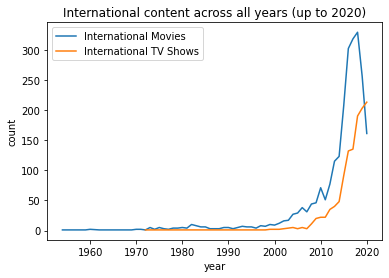

In [26]:
# International Content across years.
international_movies = netflix_df1[netflix_df1['listed_in'].str.contains('International Movies')]
international_movies = pd.DataFrame(international_movies['release_year'].value_counts()).reset_index().rename(columns={'index': 'year','release_year':'count'})
international_movies = international_movies[international_movies.year != 2021]

international_tvshow = netflix_df1[netflix_df1['listed_in'].str.contains('International TV Shows')]
international_tvshow = pd.DataFrame(international_tvshow['release_year'].value_counts()).reset_index().rename(columns={'index': 'year','release_year':'count'})
international_tvshow = international_tvshow[international_tvshow.year != 2021]

sns.lineplot(data=international_movies, x='year', y='count')
sns.lineplot(data=international_tvshow, x='year', y='count')
plt.title("International content across all years (up to 2020)")
plt.legend(['International Movies','International TV Shows'])

OBDERVATION:

More international movies are released than international television shows. The **growth** of international movies started to reduce in 2018 and international TV shows started to slow down in 2019.

SUMMARY SO FAR:

1. The most content type on Netflix is movies.
2. The largest count of Netflix content is made with a 'TV-MA' rating.
3. After 2014 the amount of content added has been increasing significantly.
4. **The number of movies in 2020 have reduced compared to its previous year. However the TV shows have increased.**
5. While most TV seasons have only 1 season, movie lengths follow a normal distribution with a mean of 100 minutes.
6. According to the amount of content produced, the United States is the top country.
7. International Movies are a genre mostly found on Netflix.
8. In terms of titles, Jan Suter is the most popular director on Netflix.
9. Anupam Kher is the most popular Netflix cast member, according to number of movies made.
10. In 2018, 2019, and 2020, the majority of films were released.
11. A large number of movies and TV Shows were released in October, November, December, and January.

### Functions

In [27]:
'''
cal_tf_idf - calculates TF-IDF dataframe.
INPUT - 
1. unique_elements : list of all the unique elements
2. element - column feature
OUTPUT - 
returns tf-idf dataframe.
'''
def cal_tf_idf(unique_elements, element):
  df_tf = pd.DataFrame(np.zeros((netflix_df1.shape[0], len(unique_elements))), columns=unique_elements)

  # Compute Term Frequency (TF)
  for i in range(netflix_df1.shape[0]):
      list_words = netflix_df1.loc[i, element].split(', ') # Words in the document
      for w in list_words:
          df_tf[w][i] = df_tf[w][i] + (1 / len(list_words))

  idf = {}

  for w in unique_elements:
      k = 0    # number of documents in the corpus that contain this word
      
      for i in range(netflix_df1.shape[0]):
          if w in netflix_df1.loc[i, element].split(', '):
              k += 1
              
      idf[w] =  np.log10(netflix_df1.shape[0] / k)

  df_tf_idf = df_tf.copy()

  for w in unique_elements:
      for i in range(netflix_df1.shape[0]):
          df_tf_idf[w][i] = df_tf[w][i] * idf[w]
          
  return df_tf_idf

In [28]:
# Installing pyLDAvis.
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=373523af93dfe9816cf3c4bd195358f147cf426a8cd7bef354223163697c96a5
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=76e103f6bc255ab536d2defc9629bef11f092b7d877cf0e62c67a6993f9f6d27
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [29]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


In [30]:
import pyLDAvis.sklearn
'''
function - 'get_country_specific_content'
Returns DTM, LDA model parameters, and Count Vectorizer for a country specific data.
Arguments passed:
'country' - is input country you want to know.
'''
def get_country_specific_content(country_df):
  # country_df has the single country data.
  reindexed_netflix_data = country_df['description']

  # Count Vectoriser
  count_vectorizer = CountVectorizer(stop_words='english')

  # Obtaining DTM
  Document_term_matrix = count_vectorizer.fit_transform(reindexed_netflix_data.values)

  grid_params = {'n_components' : list(range(5,10))}

  # LDA model
  lda = LatentDirichletAllocation()
  lda_model = GridSearchCV(lda,param_grid=grid_params)
  lda_model.fit(Document_term_matrix)

  # Best LDA model
  best_lda_model = lda_model.best_estimator_

  # Transform and prepare a LDA model’s data for visualization
  pyLDAvis.enable_notebook()
  lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, Document_term_matrix, count_vectorizer, mds='tsne')
  return lda_panel

In [31]:
'''
function - 'get_specific_country_plots'
Plots the following:
1. Count plot for Movies and TV Shows.
2. Count plot for ratings of Movies and TV Shows.
3. Count plot for Top 10 cast.
4. Count plot for Top 10 countries.
5. Count plot for Top 10 TV Shows Seasons.
6. Displot for Duration Distribution for Netflix Movies.
Arguments passed:
'country_df' - Dataset for a specific country.
'''
def get_specific_country_plots(country_df):
  # Count plot for Movies and TV Shows.
  plt.figure(figsize=(31,20))
  plt.subplot(3, 2, 1)
  sns.countplot(x="type", data=country_df)
  plt.title("Count of Movies and TV Shows", fontsize=14)

  plt.subplot(3, 2, 2)
  # Count plot for ratings of Movies and TV Shows.
  sns.countplot(x="rating", data=country_df, hue='type')
  plt.title("Ratings", fontsize=14)

  plt.subplot(3, 2, 3)
  # Count plot for Top 10 cast.
  cast = country_df[country_df['cast'] != 'No Cast'].cast.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
  sns.countplot(y = cast, order=cast.value_counts().index[:10])
  plt.title("Top 10 cast", fontsize=14)

  plt.subplot(3, 2, 4)
  # Count plot for Top 10 countries.
  genre_df = country_df.listed_in.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
  sns.countplot(y = genre_df, order=genre_df.value_counts().index[:10])
  plt.title("Top 10 genre", fontsize=14)

  plt.subplot(3, 2, 5)
  # Count plot for Top 10 TV Shows Seasons.
  show_df = pd.DataFrame(country_df[country_df.type == 'TV Show'].duration.replace(['1 Season'], '1 Seasons').str.replace(' Seasons','').sort_values()).astype(int)
  sns.countplot(data = show_df, x = 'duration', order = list(range(1,10)))
  plt.title("Top 10 TV Shows Seasons", fontsize=14)

  plt.subplot(3, 2, 6)
  # Displot for Duration Distribution for Netflix Movies.
  movie_df = pd.DataFrame(country_df[country_df.type == 'Movie'].duration.str.replace(' min', '').astype(int))
  sns.distplot(movie_df.duration)
  plt.title("Duration Distribution for Netflix Movies", fontsize=14)

### **Understanding what type content is available in different countries**

In [32]:
# countries dataframe has the show, broadcasted countries and type.
countries = pd.DataFrame(netflix_df1['country'].str.split(',', expand = True).stack().reset_index(level = 1, drop = True), columns = ['country'])
countries['type'] = [netflix_df1.loc[i, 'type'] for i in countries.index]

In [33]:
# top_countries has all the top 20 countries and content type
top_20_countries = [i for i in list(countries.country.value_counts()[:21].index) if i not in ['Country Not Available']]
top_countries = pd.DataFrame()
k = 0
for i, j in zip(countries.type, countries.country):
  if j in top_20_countries:
    top_countries.loc[k, 'country'] = j
    top_countries.loc[k, 'type'] = i
    k = k + 1

Text(0.5, 1.0, 'Type for Top 20 countries')

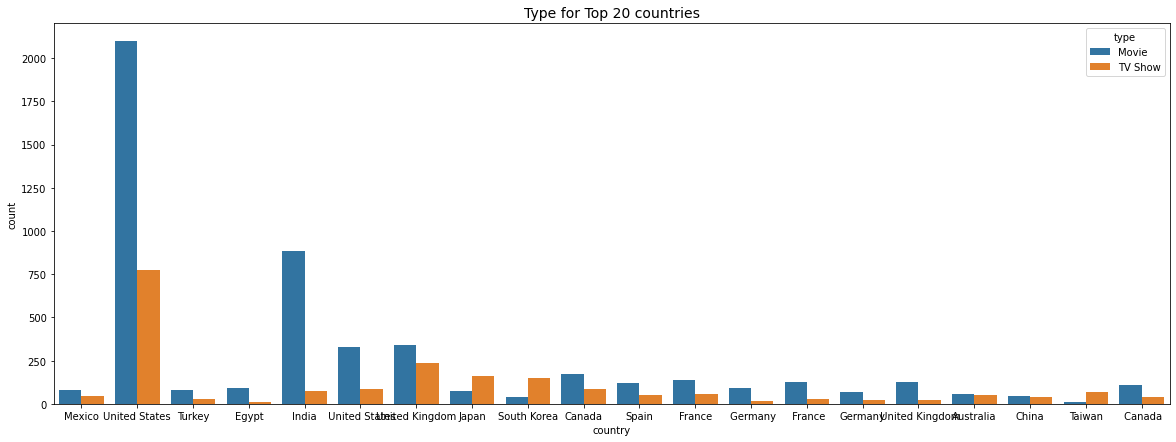

In [34]:
# Netflix Film Ratings
plt.figure(figsize=(20,7))
sns.countplot(x = "country", data = top_countries, hue = 'type')
plt.title("Type for Top 20 countries", fontsize=14)

The number of movies in many countries is higher than the number of TV shows. There are few countries with more TV shows than movies, such as Japan, South Korea, Taiwan, etc.

For a detailed analysis, I am analysing data for a single country from the list of more than 100 countries available in the dataset.

Topic Modelling on specific country dataset.

Choosing the country to be United States.

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  23.237092
4       51.163364 -159.968018       2        1  22.939356
2      -73.144554   21.523815       3        1  19.305948
0      -66.410133 -110.606438       4        1  19.173647
1       54.417324   12.443444       5        1  15.343957, topic_info=          Term        Freq       Total Category  logprob  loglift
10027    world  129.000000  129.000000  Default  30.0000  30.0000
8616   stories   39.000000   39.000000  Default  29.0000  29.0000
3832      girl   41.000000   41.000000  Default  28.0000  28.0000
7916    secret   41.000000   41.000000  Default  27.0000  27.0000
4295   holiday   23.000000   23.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
10087    young   10.010506  107.514921   Topic5  -6.3080  -0.4995
3663   friends    9.310652   88.153695   Topic5  -6.3805  -0.3735
7848    school    9.369168   96.719175   Topic5  -6.3742  -0.4599
5448       man    8.616117   72.875673   Topic5  -6.4580  -0.2607
5352      love    8.128837   70.844169   Topic5  -6.5162  -0.2906

[427 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
11         4  0.777144       15
11         5  0.129524       15
69         2  0.946817     1997
169        4  0.644611   abused
222        1  0.220094   actors
...      ...       ...      ...
10087      4  0.130214    young
10087      5  0.093010    young
10089      1  0.700660  younger
10089      2  0.140132  younger
10089      4  0.140132  younger

[870 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 1, 2])

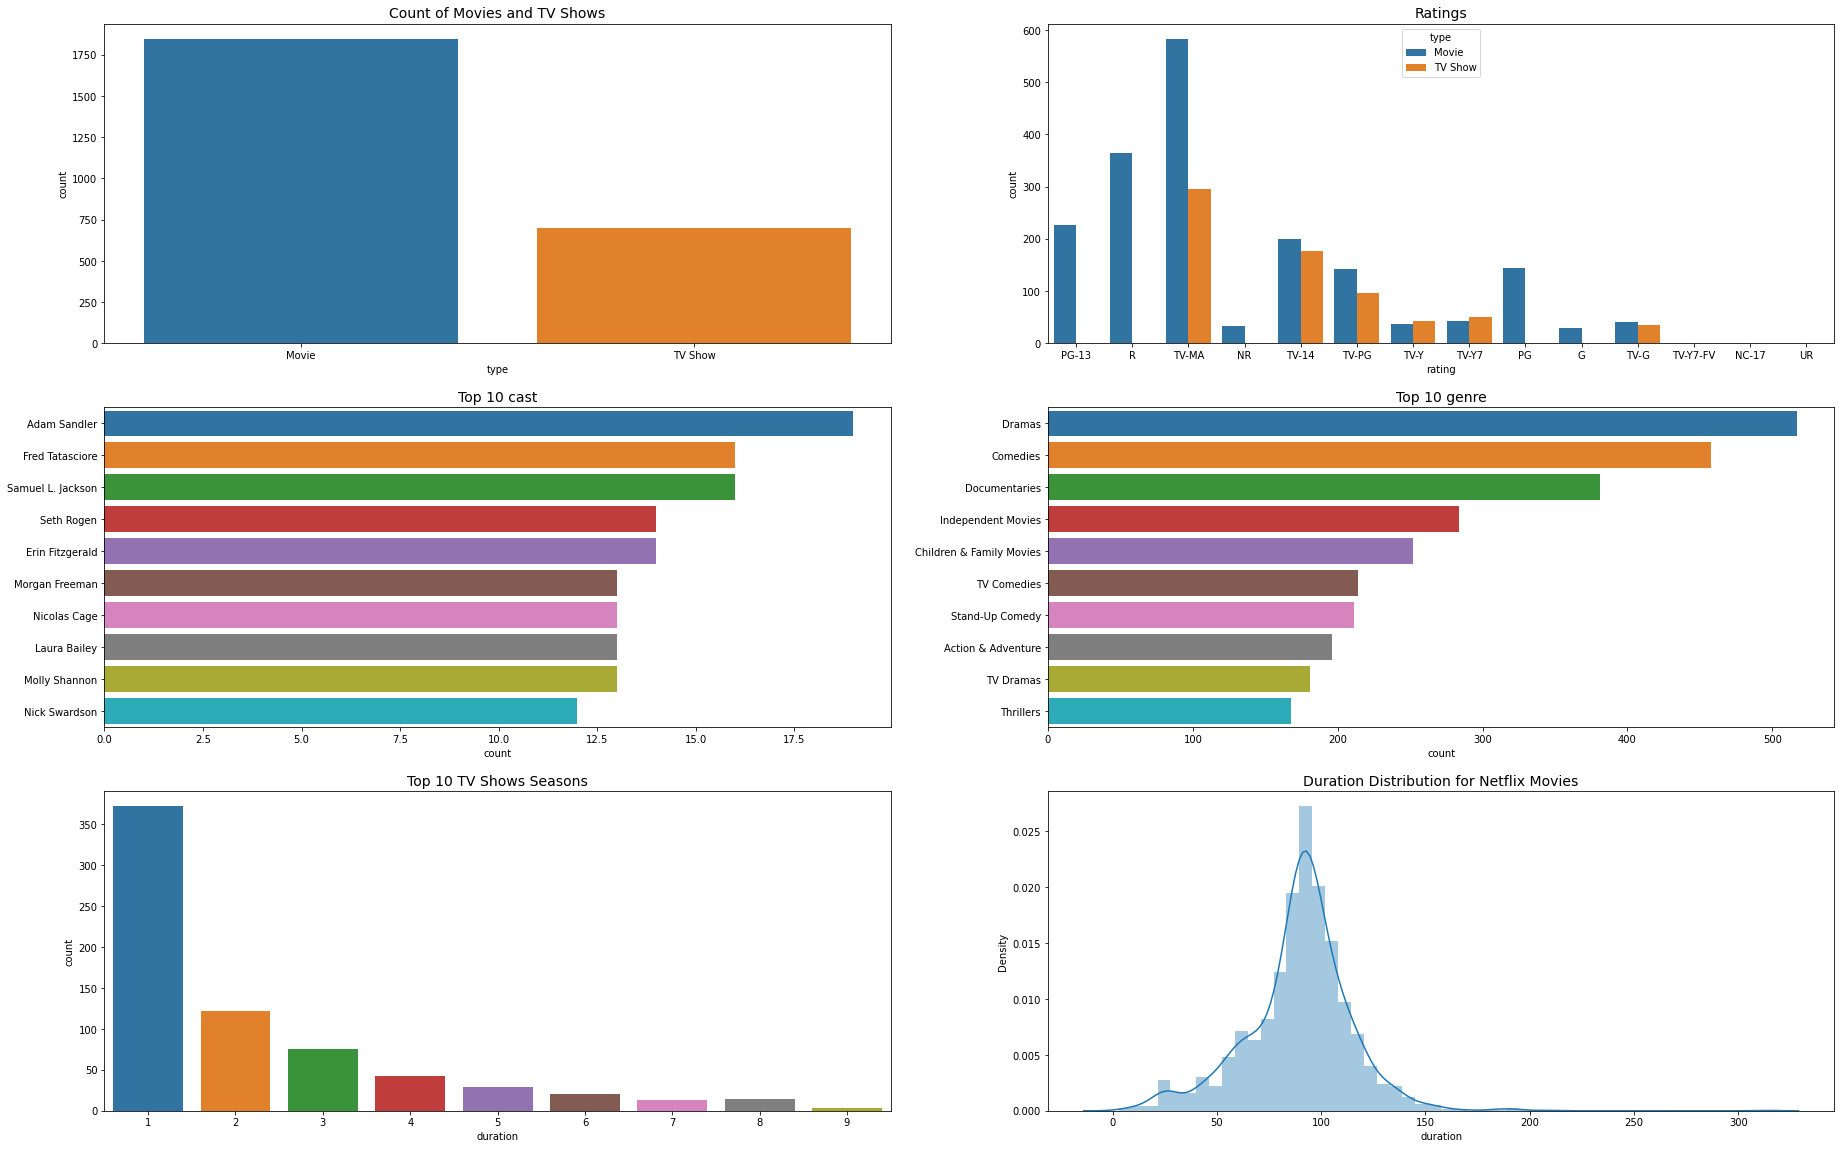

In [35]:
# country_df - Dataset for a specified country.
country_df = netflix_df1[netflix_df1['country'] == 'United States']
country_df = country_df.reset_index(drop = True)
get_specific_country_plots(country_df)
get_country_specific_content(country_df)

OBSERVATION:

1. I am analysing the content for the United States.
2. There are five topics in Topic Modelling, and here is what I understand about each: 

> * Topic - 1 : There is a strong focus on high school and teenage stories in this topic.
> * Topic - 2 : Typically, the topic focuses on family-related comedy series or dramas.
> * Topic - 3 : This topic focuses on documentaries and series from around the world.
> * Topic - 4 : It focuses primarily on documentaries.
> * Topic - 5 : It focuses on New York and star-studded lifestyles.

3. The number of movies on Netflix in the United States is greater than the number of TV shows. A majority of movies are aimed at mature audiences, and TV shows are aimed at both mature and younger audiences.

> * Adam Sandler is the most frequently cast actor in the United States.
> * Drama, comedy, and documentary are the most popular genres in the United States.
> * The majority of American movies last for 100 minutes.

### **K-Means Clustering**

In this segment I am considering the following features:
1. type
2. director
3. cast
4. country
5. year_added
6. month_added
6. release_year
7. rating
8. duration
9. listed_in



Prior to creating the k-means clustering model perform data featuring such as:
* Fill NaN values with 'Other' value.
* New features include - 
> * Grouping 'rating' feature.
> * Creating - 'Director_sum', 'Cast_sum', 'Country_sum', 'listed_in_sum'
> * Standardizing all the features.
* Dropping 'show_id', 'title', 'director', 'cast', 'country', 'date_added', 'listed_in', 'description', 'duration' features.

In [51]:
netflix_df_kmeans = netflix_df1.copy()

In [52]:
# I believe we can group all the ratings into G, PG, PG-13, R, NC-17, and No Rating.
# From what I understand, 'TV-PG' refers to a TV show that is PG rated whereas just 'PG' refers to a PG rated movie. As a result, I merged them into PG.
netflix_df_kmeans['rating'].replace({'UR' : 0, 'NR' : 0, 'NC-17' : 5, 'TV-MA' : 5, 'G' : 1, 'TV-Y' : 1, 'TV-G' : 1, 'PG' : 2, 'TV-Y7' : 2, 'TV-PG' : 2, 'TV-14' : 3, 'PG-13' : 3, 'TV-Y7-FV' : 3, 'R' : 4}, inplace = True)

In [53]:
# Standarising 'duration' feature for 'Movie' and 'TV Show' separately and merging them together.
duration_movie_time = netflix_df_kmeans[netflix_df_kmeans['type'] == 'Movie'].duration.str.split(' ', expand = True)[0]
Scaler = StandardScaler()
std_movie_duration = pd.DataFrame(Scaler.fit_transform(np.array(duration_movie_time).reshape(-1, 1)), index = duration_movie_time.index, columns = ['std_duration'])
duration_tvshow_time = netflix_df_kmeans[netflix_df_kmeans['type'] == 'TV Show'].duration.str.split(' ', expand = True)[0]
std_tvshow_duration = pd.DataFrame(Scaler.fit_transform(np.array(duration_tvshow_time).reshape(-1, 1)), index = duration_tvshow_time.index, columns = ['std_duration'])
std_duration = pd.concat([std_movie_duration, std_tvshow_duration])
netflix_df_kmeans = pd.merge(netflix_df_kmeans, std_duration, how = 'inner', left_index=True, right_index=True)

In [54]:
# Performing Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
netflix_df_kmeans['type'] = ordinal_encoder.fit_transform(np.array(netflix_df_kmeans['type']).reshape(-1, 1))

In [55]:
# Computing the list of unique directors, casts, countries, and listed_in features.
unique_directors = netflix_df_kmeans['director'].str.split(', ', expand=True).stack().reset_index(level = 1, drop = True).unique()
unique_casts = netflix_df_kmeans['cast'].str.split(', ', expand=True).stack().reset_index(level = 1, drop = True).unique()
unique_countries = netflix_df_kmeans['country'].str.split(', ', expand=True).stack().reset_index(level = 1, drop = True).unique()
unique_listed_in = netflix_df_kmeans['listed_in'].str.split(', ', expand=True).stack().reset_index(level = 1, drop = True).unique()

In [ ]:
'''
This code is commented because it takes a lot of time to run.
So, instead of running it everytime, it is converted into a csv file and stored in the drive.

director_df_tf_idf = cal_tf_idf(unique_directors, 'director')
director_df_tf_idf.to_csv('/content/drive/MyDrive/assign_csv/director.csv')

cast_df_tf_idf = cal_tf_idf(unique_casts, 'cast')
cast_df_tf_idf.to_csv('/content/drive/MyDrive/assign_csv/casts.csv')

country_df_tf_idf = cal_tf_idf(unique_countries, 'country')
country_df_tf_idf.to_csv('/content/drive/MyDrive/assign_csv/countries.csv')

listed_in_df_tf_idf = cal_tf_idf(unique_listed_in, 'listed_in')
listed_in_df_tf_idf.to_csv('/content/drive/MyDrive/assign_csv/listed_in.csv')
'''

"\nThis code is commented because it takes a lot of time to run.\nSo, instead of running it everytime, it is converted into a csv file and stored in the drive.\n\ndirector_df_tf_idf = cal_tf_idf(unique_directors, 'director')\ndirector_df_tf_idf.to_csv('/content/drive/MyDrive/assign_csv/director.csv')\n\ncast_df_tf_idf = cal_tf_idf(unique_casts, 'cast')\ncast_df_tf_idf.to_csv('/content/drive/MyDrive/assign_csv/casts.csv')\n\ncountry_df_tf_idf = cal_tf_idf(unique_countries, 'country')\ncountry_df_tf_idf.to_csv('/content/drive/MyDrive/assign_csv/countries.csv')\n\nlisted_in_df_tf_idf = cal_tf_idf(unique_listed_in, 'listed_in')\nlisted_in_df_tf_idf.to_csv('/content/drive/MyDrive/assign_csv/listed_in.csv')\n"

In [ ]:
# The below dataframes are the computed TF-IDF matrix.
director_df = pd.read_csv('/content/drive/MyDrive/assign_csv/director.csv')
cast_df = pd.read_csv('/content/drive/MyDrive/assign_csv/casts.csv')
country_df = pd.read_csv('/content/drive/MyDrive/assign_csv/countries.csv')
listed_in_df = pd.read_csv('/content/drive/MyDrive/assign_csv/listed_in.csv')

In [ ]:
# Summing across the columns of TF-IDF matrix.
sum_director_df = pd.DataFrame(director_df.drop(['Unnamed: 0'], axis = 1).sum(axis = 1), columns = ['Director_sum'])
sum_cast_df = pd.DataFrame(cast_df.drop(['Unnamed: 0'], axis = 1).sum(axis = 1), columns = ['Cast_sum'])
sum_country_df = pd.DataFrame(country_df.drop(['Unnamed: 0'], axis = 1).sum(axis = 1), columns = ['Country_sum'])
sum_listed_in_df = pd.DataFrame(country_df.drop(['Unnamed: 0'], axis = 1).sum(axis = 1), columns = ['listed_in_sum'])

In [ ]:
netflix_df_kmeans = pd.concat([netflix_df_kmeans, sum_director_df, sum_cast_df, sum_country_df, sum_listed_in_df], axis = 1)

In [ ]:
# Dropping 'show_id', 'title', 'director', 'cast', 'country', 'date_added', 'listed_in', 'description', 'duration'
netflix_df_kmeans.drop(['show_id', 'title', 'director', 'cast', 'country', 'date_added', 'listed_in', 'description', 'duration'], axis = 1, inplace = True)

**Create (K-Means) Clusters**

Finding the best fit for k means clustering.

In [ ]:
# Standarization
std_scaler = StandardScaler()
netflix_df_kmeans = pd.DataFrame(std_scaler.fit_transform(netflix_df_kmeans[list(netflix_df_kmeans.columns)]))

In [ ]:
# Creating K-Means and computing scores.
Nc = range(2, 35)
kmeans = [KMeans(n_clusters=i, init = 'k-means++', random_state = 42) for i in Nc]
score = [kmeans[i].fit(netflix_df_kmeans).score(netflix_df_kmeans) for i in range(len(kmeans))]

Text(0.5, 1.0, 'Elbow Curve')

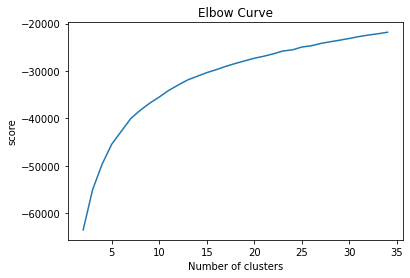

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Nc, score)
  
# naming the x axis
plt.xlabel('Number of clusters')
# naming the y axis
plt.ylabel('score')
  
# giving a title to my graph
plt.title('Elbow Curve')

From the elbow curve, it seems to be optimal to choose 20 clusters.

In [ ]:
from sklearn.metrics import silhouette_score
silhouettescore = []

for i in range(2, 35):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(netflix_df_kmeans)
  silhouettescore.append(silhouette_score(netflix_df_kmeans, kmeans.labels_))

Text(0.5, 1.0, 'silhouette score Curve')

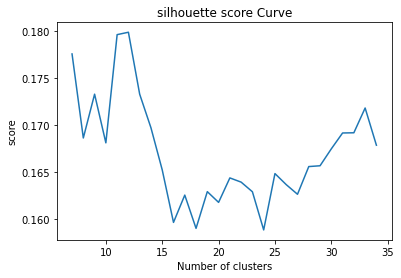

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(7, 35), silhouettescore[5:])
  
# naming the x axis
plt.xlabel('Number of clusters')
# naming the y axis
plt.ylabel('score')
  
# giving a title to my graph
plt.title('silhouette score Curve')

The silhouette score curve provides a better idea of how many clusters to have, and here there are 15 clusters.

In [ ]:
#fitting
kmeans = KMeans(n_clusters=12, init = 'k-means++', random_state = 42)
kmeans.fit(netflix_df_kmeans)
netflix_df_kmeans['cluster'] = kmeans.labels_

Text(0, 0.5, 'Data in a cluster')

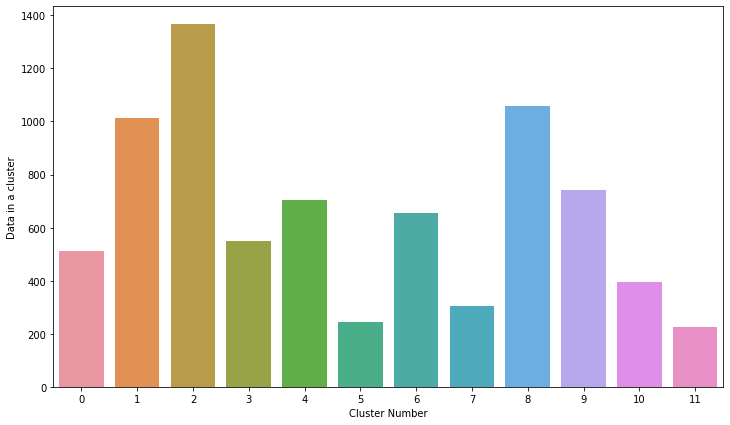

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt = sns.countplot(netflix_df_kmeans['cluster'])
plt.set_xlabel("Cluster Number")
plt.set_ylabel("Data in a cluster")

Testing K-Means

Testing the k-means clustering model using one of the movies, 13 Reasons Why.

In [ ]:
# Get cluster number from given movie or TV show
cluster_num = netflix_df_kmeans[netflix_df1.title=='13 Reasons Why'].cluster.item()

# View cluster the movie or TV show belongs to
netflix_df1[netflix_df_kmeans.cluster == cluster_num]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
29,s30,TV Show,#blackAF,No Director,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020-04-17,2020,TV-MA,1 Season,TV Comedies,Kenya Barris and his family navigate relations...,4,2020
53,s54,TV Show,100 Humans,No Director,"Zainab Johnson, Sammy Obeid, Alie Ward",United States,2020-03-13,2020,TV-14,1 Season,"Docuseries, Science & Nature TV",One hundred hardy souls from diverse backgroun...,3,2020
63,s64,TV Show,13 Reasons Why,No Director,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,2020-06-05,2020,TV-MA,4 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","After a teenage girl's perplexing suicide, a c...",6,2020
64,s65,TV Show,13 Reasons Why: Beyond the Reasons,No Director,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,2019-08-23,2019,TV-MA,3 Seasons,"Crime TV Shows, Docuseries","Cast members, writers, producers and mental he...",8,2019
107,s109,TV Show,3Below: Tales of Arcadia,No Director,"Tatiana Maslany, Diego Luna, Nick Offerman, Ni...",United States,2019-07-12,2019,TV-Y7,2 Seasons,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...","After crash-landing on Earth, two royal teen a...",7,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661,s7679,TV Show,WWII in HD,No Director,"Gary Sinise, Rob Lowe, Josh Lucas, Justin Bart...",United States,2020-05-02,2009,TV-14,1 Season,Docuseries,Rare color footage interwoven with firsthand i...,5,2020
7665,s7683,TV Show,Wynonna Earp,No Director,"Melanie Scrofano, Shamier Anderson, Tim Rozon,...","Canada, United States",2019-07-16,2018,TV-14,3 Seasons,"International TV Shows, TV Action & Adventure,...",The outcast descendant of lawman Wyatt Earp te...,7,2019
7695,s7713,TV Show,Yo-Kai Watch,No Director,"Johnny Yong Bosch, J.W. Terry, Alicyn Packard,...",United States,2016-04-01,2015,TV-Y7,1 Season,"Anime Series, Kids' TV",Nate frees a mythical being trapped in a magic...,4,2016
7713,s7731,TV Show,You vs. Wild,No Director,Bear Grylls,United States,2019-04-10,2019,TV-PG,1 Season,"Kids' TV, Reality TV, Science & Nature TV","In this interactive series, you'll make key de...",4,2019


Below are few of the movies recommended for '13 Reasons Why': 

'#blackAF',
 '100 Humans',
 '13 Reasons Why',
 '13 Reasons Why: Beyond the Reasons',
 '3Below: Tales of Arcadia',
 '7 (Seven)',
 '9 Months That Made You',
 'A Little Help with Carol Burnett',
 'A Series of Unfortunate Events',
 'A Year In Space',
 'A.D. Kingdom and Empire',
 'Abstract: The Art of Design',
 'Absurd Planet',
 'Adam Ruins Everything',
 'AJ and the Queen',
 'Alexa & Katie',
 'All About the Washingtons',
 'All American', etc.


OBSERVATION:

In the cluster containing '13 Reasons Why', the following details can be inferred:

1. The cluster number is 3.
2. Cluster-3 has mostly TV shows and very few movies.
3. In the director feature, this cluster has mostly 'No Director'.
4. In terms of country features, the cluster consists mostly of the US, UK, Canada, and India.
5. The date_added feature is between 2015 and 2021.

### **Natural Language Processing (NLP) Model**

Convert all plot descriptions to word vectors so they can be processed by the NLP model.

In [36]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

* Apply the function to each observation.
* Removing all the punctuations in the description feature.

In [37]:
# Creating netflix_df2
netflix_df2 = netflix_df1.copy()
# Removing punctuations from Description
netflix_df2['description'] = netflix_df2['description'].apply(remove_punctuation)

Next important step is to remove stopwords

* Extract the stop words

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

* Function to remove stopwords

In [40]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [41]:
# Removing stopwords from description.
netflix_df2['description'] = netflix_df2['description'].apply(stopwords)

Stemming operations

* A funtion to carry out stemming operation

In [42]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

* Apply the function to each observation

In [43]:
netflix_df2['description'] = netflix_df2['description'].apply(stemming)

Top words after stemming operation

* Collect vocabulary count

In [44]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(netflix_df2['description'])

words_list = list(tfid_vectorizer.get_feature_names_out())

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

* Bar plot of top words after stemming

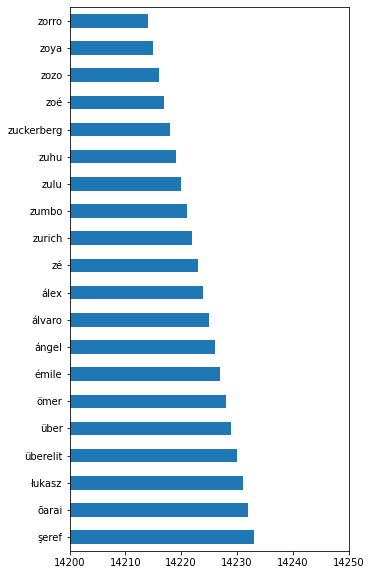

In [45]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (14200, 14250))

TFIDF matrix calculation

In [46]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(netflix_df2['description'])
# collect the tfid matrix in numpy array
array = tfid_matrix.toarray()

In [47]:
# store the tf-idf array into pandas dataframe
df = pd.DataFrame(array)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14224,14225,14226,14227,14228,14229,14230,14231,14232,14233
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Testing NLP with an input movie

In [48]:
# fuction to get top five movie/ TV Show recommendations
def recommend(Movie):
  indices = pd.Series(netflix_df2['title']).reset_index(drop = True)
  # To get the index of the movie title matching the input movie
  idx = indices[indices == Movie].index[0]
  # Print top 10 word list
  print(f'Top 10 word list in "{Movie}"\n')
  for i in list(df.loc[idx,:].sort_values(ascending = False)[0:11].index):
    print(words_list[i])

  # Printing the description of the desired movie
  pd.options.display.max_colwidth = 500
  print('\nDescription for ' + Movie + ':\n' + netflix_df1[netflix_df2['title'] == Movie].description.values[0])
  # Top 10 word list
  index_ = list(df.loc[idx,:].sort_values(ascending = False)[0:11].index)
  # Taking the top 5 movies where above 10 word list count is maximum.
  series_ = df.loc[:, index_].sum(axis = 1).sort_values(ascending = False)[1:6] # to get the indices of top 5 most similar movies


  print('\n\nThe following are the recommended Movies:')
  for i in list(series_.index):   # to append the titles of top 10 similar movies to the recommended_movies list
    title = netflix_df1[netflix_df1.title == indices.loc[i]].title.values[0]
    description = netflix_df1[netflix_df1.title == indices.loc[i]].description.values[0]
    print(f'\nMovie - {title} : \ndescription - {description}')

In [49]:
# Input movie
Movie = '13 Reasons Why'
# Movie recommendations
recommend(Movie)

Top 10 word list in "13 Reasons Why"

perplex
tape
choic
receiv
suicid
unravel
tragic
classmat
teenag
mysteri
girl

Description for 13 Reasons Why:
After a teenage girl's perplexing suicide, a classmate receives a series of tapes that unravel the mystery of her tragic choice.


The following are the recommended Movies:

Movie - Not Alone : 
description - An 18-year-old struggling to understand her best friend's suicide talks to teenagers who have grappled with mental illness and suicidal thoughts.

Movie - Devil's Bride : 
description - On a small Finnish island in 1666, a teenage girl in love with a married fisherman becomes the center of a tragic witch hunt and power struggle.

Movie - Hotel Beau Séjour : 
description - Caught in an afterlife limbo, teenage Kato investigates her own mysterious death and unravels a web of secrets in her seemingly tranquil village.

Movie - Shutter : 
description - After killing a young girl in a hit-and-run accident, a couple is haunted by more than j

### **NLP + KMeans**

This section is just to see if I can improve the above two recommendation methods. First of all, I believe tweaking a few features should improve the recommendation. Since the description dataframe(df) in the NLP section has more than 14,000 columns, adding all those columns will not benefit K-Means clustering. As a result, only the necessary columns are chosen and clustering is performed accordingly.

This section differs from the K-Means Clustering section by including description obtained from NLP section.



In [56]:
netflix_nlp_kmeans = netflix_df_kmeans.copy()

In [ ]:
# 'Cluster' feature is dropped
netflix_nlp_kmeans.drop('cluster', axis = 1, inplace = True)

In [ ]:
# Taking the sum of only few columns which are more revelant in '13 Reasons Why'
index = netflix_df1[netflix_df1.title == '13 Reasons Why'].index[0]
genres = df.loc[index, :].sort_values(ascending = False)[0:11].index
netflix_nlp_kmeans['sum_description'] = df[genres].sum(axis = 1)

In [ ]:
# K-Means clustering
Nc = range(2, 35)
kmeans = [KMeans(n_clusters=i, init = 'k-means++', random_state = 42) for i in Nc]
score = [kmeans[i].fit(netflix_nlp_kmeans).score(netflix_nlp_kmeans) for i in range(len(kmeans))]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Nc, score)
  
# naming the x axis
plt.xlabel('Number of clusters')
# naming the y axis
plt.ylabel('score')
  
# giving a title to my graph
plt.title('Elbow Curve')

In [ ]:
# silhouette score
from sklearn.metrics import silhouette_score
silhouettescore = []
for i in range(2, 35):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(netflix_nlp_kmeans)
  silhouettescore.append(silhouette_score(netflix_nlp_kmeans, kmeans.labels_))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(7, 35), silhouettescore[5:])
  
# naming the x axis
plt.xlabel('Number of clusters')
# naming the y axis
plt.ylabel('score')
  
# giving a title to my graph
plt.title('Silhouette score Curve')

Silhouette score Curve is used to calculate is used to find the optimal solution to number of clusters.

In this case the optimal number of clusters = 12.

In [ ]:
#fitting
kmeans = KMeans(n_clusters=12, random_state = 42)
kmeans.fit(netflix_nlp_kmeans)
netflix_nlp_kmeans['cluster'] = kmeans.labels_
netflix_nlp_kmeans.head()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt = sns.countplot(netflix_nlp_kmeans['cluster'])
plt.set_xlabel("Cluster Number")
plt.set_ylabel("Data in a cluster")

In [ ]:
# Get cluster number from given movie or TV show
cluster_num = netflix_nlp_kmeans[netflix_df1.title=='13 Reasons Why'].cluster.item()

# View cluster the movie or TV show belongs to
netflix_df1[netflix_nlp_kmeans.cluster == cluster_num]

Below are few of the movies recommended for '13 Reasons Why':

'#blackAF',
 '100 Humans',
 '13 Reasons Why: Beyond the Reasons',
 '3Below: Tales of Arcadia',
 '7 (Seven)',
 '9 Months That Made You',
 'A Little Help with Carol Burnett',
 'A Series of Unfortunate Events',
 'A Year In Space',
 'A.D. Kingdom and Empire',
 'Abstract: The Art of Design',
 'Absurd Planet',
 'Adam Ruins Everything',
 'AJ and the Queen',
 'Alexa & Katie',
 'All About the Washingtons',
 'All American',
 'Altered Carbon',
 "America's Book of Secrets",
 "America's Next Top Model",
 'American Crime',
 'American Crime Story: The People v. O.J. Simpson',
 'American Odyssey',
 'American Vandal',
 'Ancient Aliens',
 'Another Life', etc.



OBSERVATION:

In the cluster containing '13 Reasons Why', the following details can be inferred:

1. The cluster number is 11.
2. Cluster-11 has mostly TV shows and very few movies.
3. In the director feature, this cluster has mostly 'No Director'.
4. In terms of country features, the cluster consists mostly of the US, UK, Canada, and India.
5. The date_added feature is between 2015 and 2021.

### PCA

In [ ]:
#appending all text column to single text column to work with
netflix_pca_df = netflix_df1.copy()
netflix_pca_df['filtered'] = netflix_pca_df['description'] + ' '+ netflix_pca_df['listed_in'] + ' ' + netflix_pca_df['rating'] + ' '+ netflix_pca_df['country']+ ' ' + netflix_pca_df['cast'] + ' '+ netflix_pca_df['director']

In [ ]:
netflix_pca_df['filtered'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. International TV Shows, TV Dramas, TV Sci-Fi & Fantasy TV-MA Brazil João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi No Director'

Text Cleaning:

In [ ]:
# to lower
netflix_pca_df['filtered' ]= netflix_pca_df['filtered'].str.lower()

In [ ]:
netflix_pca_df['filtered'] = netflix_pca_df['filtered'].apply(remove_punctuation)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# extracting the stopwords from nltk library
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stopwords from description.
netflix_pca_df['filtered'] = netflix_pca_df['filtered'].apply(stopwords)

In [ ]:
netflix_pca_df['filtered'] = netflix_pca_df['filtered'].apply(stemming)

In [ ]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=15000)

# fit the vectorizer using the text data
tfid_vectorizer.fit(netflix_pca_df['filtered'])

words_list = list(tfid_vectorizer.get_feature_names_out())

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(netflix_pca_df['filtered'])
# collect the tfid matrix in numpy array
array = tfid_matrix.toarray()

In [ ]:
array.shape

(7770, 15000)

In [ ]:
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(array)

PCA()

Text(0, 0.5, 'cumulative explained variance')

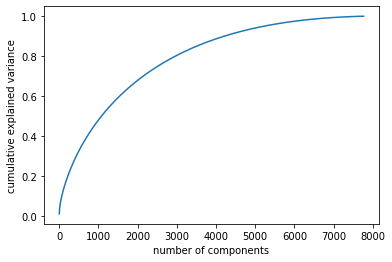

In [ ]:
#explained var v/s comp
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
#choosing right dim from plot, this might take a while, for ready ans use n_components = 3000
from sklearn.decomposition import PCA
transformer = PCA(n_components=3000)
transformer.fit(array)
X_transformed = transformer.transform(array)
X_transformed.shape

(7770, 3000)

In [ ]:
# Sample code to run the KElbowVisualizer
from sklearn.cluster import KMeans

In [ ]:
# K-Means clustering
Nc = range(4, 22)
kmeans = [KMeans(n_clusters=i, init = 'k-means++', random_state = 42) for i in Nc]
score = [kmeans[i].fit(array).score(array) for i in range(len(kmeans))]

Text(0.5, 1.0, 'Elbow Curve')

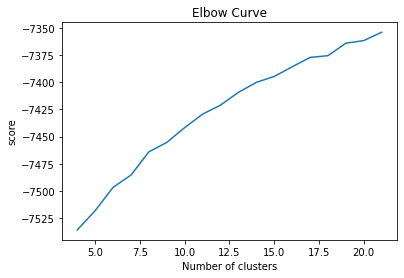

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Nc, score)
  
# naming the x axis
plt.xlabel('Number of clusters')
# naming the y axis
plt.ylabel('score')
  
# giving a title to my graph
plt.title('Elbow Curve')

In [ ]:
# silhouette score
from sklearn.metrics import silhouette_score
silhouettescore = []
for i in range(3, 35, 2):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(array)
  silhouettescore.append(silhouette_score(array, kmeans.labels_))

Text(0.5, 1.0, 'Silhouette score Curve')

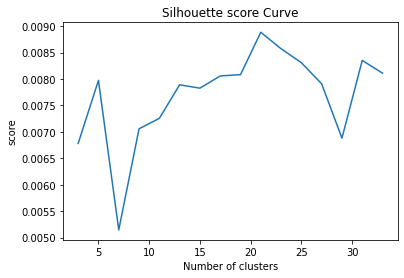

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(3, 35, 2), silhouettescore)
  
# naming the x axis
plt.xlabel('Number of clusters')
# naming the y axis
plt.ylabel('score')
  
# giving a title to my graph
plt.title('Silhouette score Curve')

In [ ]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=21, init= 'k-means++')
kmeans.fit(array)

KMeans(n_clusters=21)

In [ ]:
array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#fitting
cluster = kmeans.labels_

In [ ]:
cluster

array([ 7, 15,  4, ...,  0,  5,  0], dtype=int32)

Text(0, 0.5, 'Data in a cluster')

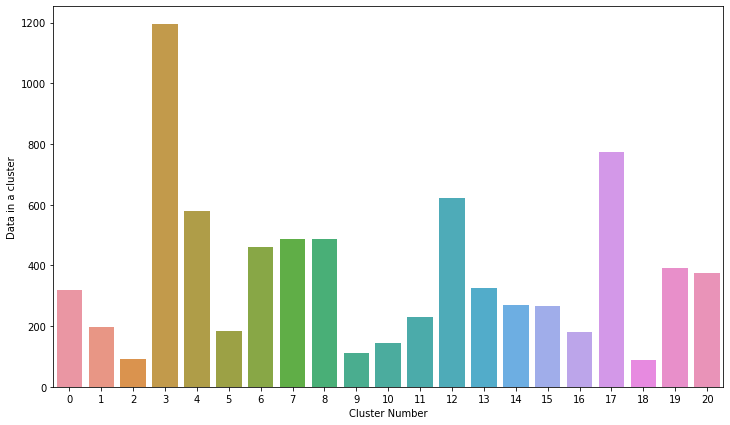

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt = sns.countplot(cluster)
plt.set_xlabel("Cluster Number")
plt.set_ylabel("Data in a cluster")

Kids, Anime, Animation

In [ ]:
netflix_df1['cluster'] = cluster

In [ ]:
# Get cluster number from given movie or TV show
cluster_num = netflix_df1[netflix_df1.title=='13 Reasons Why'].cluster.item()

# View cluster the movie or TV show belongs to
netflix_df1[netflix_df1.cluster == cluster_num][:15]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,cluster
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020,7
29,s30,TV Show,#blackAF,No Director,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020-04-17,2020,TV-MA,1 Season,TV Comedies,Kenya Barris and his family navigate relations...,4,2020,7
63,s64,TV Show,13 Reasons Why,No Director,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,2020-06-05,2020,TV-MA,4 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","After a teenage girl's perplexing suicide, a c...",6,2020,7
85,s87,TV Show,21 Sarfarosh: Saragarhi 1897,No Director,"Luke Kenny, Mohit Raina, Mukul Dev",India,2018-12-01,2018,TV-14,1 Season,"International TV Shows, TV Dramas","In one of history's greatest last stands, a ba...",12,2018,7
224,s226,TV Show,A Series of Unfortunate Events,No Director,"Neil Patrick Harris, Patrick Warburton, Malina...",United States,2019-01-01,2019,TV-PG,3 Seasons,"Kids' TV, TV Action & Adventure, TV Comedies",The extraordinary Baudelaire orphans face tria...,1,2019,7
247,s249,TV Show,A Very Secret Service,No Director,"Hugo Becker, Wilfred Benaïche, Christophe Kour...",France,2018-07-30,2018,TV-MA,2 Seasons,"International TV Shows, TV Comedies","At the height of the Cold War in 1960, André M...",7,2018,7
304,s307,TV Show,Adam Ruins Everything,No Director,"Adam Conover, Adam Lustick, Emily Axford",United States,2018-09-30,2018,TV-14,1 Season,TV Comedies,Education can be fun – and funny. Comedian Ada...,9,2018,7
322,s325,TV Show,After Life,No Director,"Ricky Gervais, Tom Basden, Tony Way, Diane Mor...",United Kingdom,2020-04-24,2020,TV-MA,2 Seasons,"British TV Shows, International TV Shows, TV C...",Struggling to come to terms with his wife's de...,4,2020,7
337,s340,TV Show,Agent,No Director,"Khumbulani Kay Sibiya, Sisanda Henna, Tarynn W...","Mauritius, South Africa",2019-12-20,2019,TV-MA,1 Season,"International TV Shows, TV Dramas",A former footballer tries to make it as a play...,12,2019,7
355,s358,TV Show,AJ and the Queen,No Director,"RuPaul Charles, Izzy G., Michael-Leon Wooley, ...",United States,2020-01-10,2020,TV-14,1 Season,"TV Comedies, TV Dramas",While traveling across the country in a run-do...,1,2020,7


In [ ]:
!pip install matplotlib-venn
import spacy
nlp = spacy.load("en_core_web_sm")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Load the large model to get the vectors
!nlp = spacy.load('en_core_web_lg')

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `nlp = spacy.load('en_core_web_lg')'


In [ ]:
# Create word vectors for all movie and TV show descriptions
with nlp.disable_pipes():
    vectors = np.array([nlp(film.description).vector for idx, film in netflix_df.iterrows()])

In [ ]:
# Function to analyze how similar two word vectors are
def cosine_similarity(a, b):
    return np.dot(a, b)/np.sqrt(a.dot(a)*b.dot(b))

In [ ]:
# Calculate the mean for all word vectors
vec_mean = vectors.mean(axis=0)

# Subtract the mean from the vectors
centered = vectors - vec_mean 

In [ ]:
# Function to get the indices of the five most similar descriptions
def get_similar_description_indices(description_vec):
    
    # Calculate similarities between given description and other descriptions in the dataset
    sims = np.array([cosine_similarity(description_vec - vec_mean, vec) for vec in centered])
    
    # Get the indices of the five most similar descriptions
    most_similar_index = np.argsort(sims)[-6:-1]
    
    return most_similar_index

In [ ]:
# Create array of lists containing indices of five most similar descriptions
similar_indices = np.array([get_similar_description_indices(vec) for vec in vectors])

In [ ]:
test_index = netflix_df.index[netflix_df.title == "Catch Me If You Can"][0]

print("Chosen Movie/TV Show")
print(netflix_df.title[test_index] + ': ' + netflix_df.description[test_index] + '\n')
print("Top Recommendations")
print(netflix_df.title[similar_indices[test_index][4]] + ': ' + netflix_df.description[similar_indices[test_index][4]] + '\n')
print(netflix_df.title[similar_indices[test_index][3]] + ': ' + netflix_df.description[similar_indices[test_index][3]] + '\n')
print(netflix_df.title[similar_indices[test_index][2]] + ': ' + netflix_df.description[similar_indices[test_index][2]] + '\n')
print(netflix_df.title[similar_indices[test_index][1]] + ': ' + netflix_df.description[similar_indices[test_index][1]] + '\n')
print(netflix_df.title[similar_indices[test_index][0]] + ': ' + netflix_df.description[similar_indices[test_index][0]] + '\n')

Chosen Movie/TV Show
Catch Me If You Can: An FBI agent makes it his mission to put cunning con man Frank Abagnale Jr. behind bars. But Frank not only eludes capture, he revels in the pursuit.

Top Recommendations
Stargate SG-1: Stargate Command roars into action when Jack O'Neill and his crew find a Stargates map that lets them combat alien maneuvers all across the galaxy.

Qin Empire: Alliance: During the Warring States period, Qin state ruler Duke Xiao recruits statesman Shang Yang to help enact bold reforms that transform western China.

Sword Art Online Alternative: Gun Gale Online: College student Karen takes up Gun Gale Online and gets a reputation as the Pink Demon. Then her gaming buddy Pitohui asks her to join the Squad Jam.

Bill Hicks: Reflections: This documentary about comedian Bill Hicks offers insight into his irreverent takes on, well, everything. Brother Steve Hicks is the star witness.

The Aerial: In the City Without a Voice, only faceless singer the Voice can still 

### **Conclusion:**

1. We started by replacing Nan values with No Director, No Cast, and Country Not Available for director, cast, and country respectively. Nan values were dropped from date_added and rating features.
2. 'date_added' feature is used to obtain the 'month_added' and 'year_added' features.
3. As a first step, we compare the top 20 countries by type - Movies vs TV Shows. From the dataset, we select country-specific data and compute LDA and Document Term Matrix(DTM). Several plots were taken to evaluate the available content for specific countries. There were several conclusions made regarding the United States, as an example.
4. In the feature engineering - the rating values were reassigned, ordinal encoding was used on the type, the string value was dropped from the duration, etc.
5. K-Means Clustering was performed on type, director, cast, country, year_added, month_added, release_year, rating, duration, listed_in features. The silhouette_score was used to calculate the number of clusters.
A test on '13 Reasons Why' was then conducted to determine the recommendations.
6. In NLP, we used only the description to determine recommendations.
7. A K-means clustering dataset with TF-IDF vectoriser from NLP is then combined for clustering with a little tweaking in the features.

1. A recommendation system with the description column works well.
2. In the case of K-means, the optimal number of clusters are 12.
3. When K-means is applied to the description sum column, the optimal number of clusters was also 12. 
4. Clustering with the description column did make a few changes in the earlier recommendations.
5. The optimal number of clusters was calculated using silhouette_score.



1. The most content type on Netflix is movies.
2. The largest count of Netflix content is made with a 'TV-MA' rating.
3. After 2014 the amount of content added has been increasing significantly.
4. The number of movies in 2020 have reduced compared to the previous year. However, the number of TV shows has increased.
5. While most TV seasons have only 1 season, movie lengths follow a normal distribution with a mean of 100 minutes.
6. According to the amount of content produced, the United States is the top country.
7. International Movies are a genre mostly found on Netflix.
8. In terms of titles, Jan Suter is the most popular director on Netflix.
9. Anupam Kher is the most popular Netflix cast member, according to number of movies made.
10. In 2018, 2019, and 2020, the majority of films were released.
11. A large number of movies and TV Shows were released in October, November, December, and January.